# REINFORMENT LEARNING FRAUD DETECTION

#### 1) Import the Necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2) Load and Display Data

In [26]:
df = pd.read_csv('data/Datasets.csv')

In [27]:
# Preview the Dataset
df.head()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


In [28]:
## Check Number of Rows and Columns
df.shape

(10127, 17)

In [29]:
# Drop Unnecessary Columns
df_drop = ["Unnamed: 0","nameOrig", "nameDest"]
df = df.drop(columns=df_drop,errors="ignore")

#### 3) Check For Missing Values

In [30]:
# Check Missing Values
df.isna().sum()

step                    0
type                    4
branch                  0
amount                  2
oldbalanceOrg           2
newbalanceOrig          0
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64

In [31]:
# Handle Missing Values
df = df.dropna()
df.isna().sum()

step                   0
type                   0
branch                 0
amount                 0
oldbalanceOrg          0
newbalanceOrig         0
oldbalanceDest         0
newbalanceDest         0
unusuallogin           0
isFlaggedFraud         0
Acct type              0
Date of transaction    0
Time of day            0
isFraud                0
dtype: int64

In [32]:
# Check For Duplicates
df.duplicated().sum()

np.int64(0)

#### 4) Summary Statistics

In [33]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,isFraud
count,10098.000000,1.009800e+04,1.009800e+04,1.009800e+04,1.009800e+04,1.009800e+04,10098.000000,10098.0,10098.000000
mean,4.217766,1.049875e+05,8.858700e+05,9.068887e+05,9.346408e+05,1.109806e+06,10.515052,0.0,0.006734
std,2.482865,2.709399e+05,2.126951e+06,2.172574e+06,2.680375e+06,3.050709e+06,5.808882,0.0,0.081788
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
25%,1.000000,4.393892e+03,1.339925e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.0,0.000000
50%,5.000000,1.280417e+04,2.137556e+04,1.025540e+04,0.000000e+00,0.000000e+00,10.000000,0.0,0.000000
75%,7.000000,1.143839e+05,1.726482e+05,1.713779e+05,2.819345e+05,2.523862e+05,16.000000,0.0,0.000000
max,7.000000,1.000000e+07,1.290000e+07,1.300000e+07,1.950000e+07,2.260000e+07,20.000000,0.0,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10098 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10098 non-null  int64  
 1   type                 10098 non-null  object 
 2   branch               10098 non-null  object 
 3   amount               10098 non-null  float64
 4   oldbalanceOrg        10098 non-null  float64
 5   newbalanceOrig       10098 non-null  float64
 6   oldbalanceDest       10098 non-null  float64
 7   newbalanceDest       10098 non-null  float64
 8   unusuallogin         10098 non-null  int64  
 9   isFlaggedFraud       10098 non-null  int64  
 10  Acct type            10098 non-null  object 
 11  Date of transaction  10098 non-null  object 
 12  Time of day          10098 non-null  object 
 13  isFraud              10098 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.2+ MB


#### 5) Visualisations

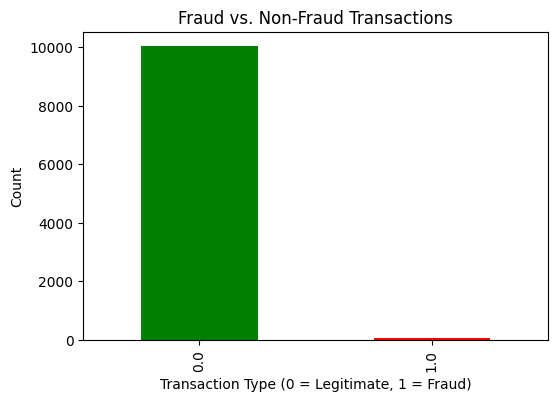

In [35]:
# Plot fraud vs. non-fraud distribution
plt.figure(figsize=(6,4))
df['isFraud'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xlabel('Transaction Type (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


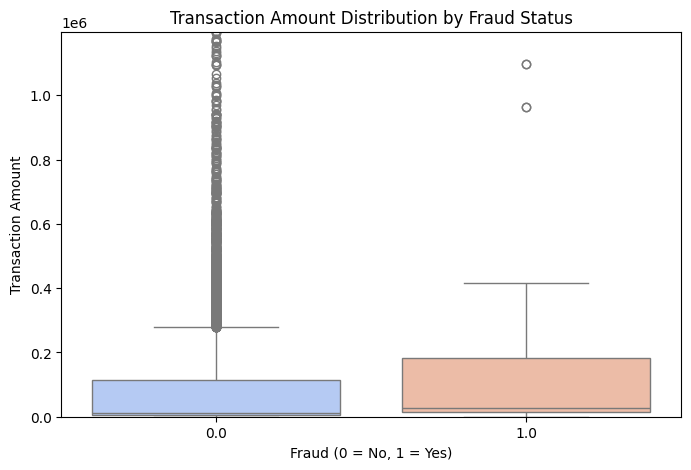

In [36]:
# Plot transaction amount distribution
plt.figure(figsize=(8,5))
sns.boxplot(x='isFraud', y='amount', data=df, palette="coolwarm")
plt.ylim(0, df['amount'].quantile(0.99))  # Remove outliers for better visualization
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
plt.show()


In [37]:
df['isFraud'].value_counts()

isFraud
0.0    10030
1.0       68
Name: count, dtype: int64

Highly Imbalanced Dataset

In [38]:
mapping_dict ={
    0.0:0,
   1.0:1}
df['isFraud'] = df['isFraud'].map(mapping_dict)
df.head()

,step,type,branch,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,170136.0,160296.36,0.0,0.0,9,0,Current,3/1/2018,Morning,0
1,1,PAYMENT,India,1864.28,21249.0,19384.72,0.0,0.0,10,0,Savings,5/1/2018,Morning,0
2,1,TRANSFER,India,181.00,181.0,0.00,0.0,0.0,2,0,Current,7/1/2018,Morning,1
3,1,CASH_OUT,Australia,181.00,181.0,0.00,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1
4,1,PAYMENT,Australia,11668.14,41554.0,29885.86,0.0,0.0,17,0,Current,6/1/2018,Morning,0
